In [177]:
import os
import tweepy as tw
import pandas as pd
import spacy
import re
import collections
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [45]:
nlp = spacy.load('es_core_news_sm')

In [178]:
stop_words = stopwords.words('spanish')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [3]:
consumer_key = "xuSrX6LK9gfsWnJ1CTQblfL83"
consumer_secret = "lIyGqVBJygUHHQ4ZoHyAc8INULSr1B4WnuCajei13QINe7U3SH"
access_token = "549909021-ksoN2E4V4yAlhAPa5EUuItuiQhSXyIKFEvCHLqMv"
access_token_secret ="JplD62xq9UPnlQ0NFekGINJZHO1nEpfmw8Myiyl6PyaXS"


In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
# Post a tweet from Python
api.update_status("El liderazgo se nota cuando se ejerce, no por el simple hecho de 'ser' un líder. #LeadershipTips")
# Your tweet has been posted!

TweepError: Read-only application cannot POST.

In [141]:
# Define the search term and the date_since date as variables
search_words = "#colombia"
date_since = "2021-01-01"
fromivanduque = "from:ivanduque"
toivanduque = "@ivanduque -filter:retweets"

In [142]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=toivanduque,
              lang="es",
              since=date_since).items(100)
tweets

In [105]:
print(tweets)

In [66]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

KeyboardInterrupt: 

In [121]:
# Collect a list of tweets
twiter_texts = [tweet.text for tweet in tweets]

In [122]:
twiter_texts


['@RUBBICON1 @IvanDuque Yo te agradezco tanto que me álabes de esa manera,espectaculares tus argumentos, pero que más se te puede pedir.',
 '@ArquimedesSo2 @SusanaGarzon3 @mancho646 @roperonando @IvanDuque @ivanduquem @JuanManSantos @UNPColombia ¿Ahora le… https://t.co/IqsW6gLTA1',
 'Cuando pensamos que lo habíamos visto todo. Hasta el presidente @IvanDuque  cayó en el juego de manipulación. Recue… https://t.co/XDeYPqS3st',
 'Venezolanos ojo 👁 a esto ! 👇🏾@IvanDuque no es amigo del pueblo Vzlano,es amigo de los millones de dólares q sacó pr… https://t.co/IHepJVg18i',
 'Marica hay que hacer algo esa reforma tributaria será horrible maldito te odio @IvanDuque',
 'Desde el Gobierno Nacional hacemos que las cosas pasen para las familias dedicadas a la actividad piscícola y de pe… https://t.co/Ri2xSPw6D4',
 '@IvanDuque será que el FGN tampoco lee lo que todos los ciudadanos le exigimos? https://t.co/VEeVd3861u',
 '@Danielelchiney2 @CatalinaSuarezB @IvanDuque Creo que está usted lejos de dial

In [123]:
print(twiter_texts[0])

@RUBBICON1 @IvanDuque Yo te agradezco tanto que me álabes de esa manera,espectaculares tus argumentos, pero que más se te puede pedir.


In [124]:
len(twiter_texts)

100

In [125]:
tweet.user.screen_name

'el_hereje_'

In [126]:
tweets_names = tweet.user.screen_name

In [127]:
tweets_location = tweet.user.location

In [128]:
user_tweets = [[tweets_names,tweets_location] for tweet in twiter_texts]

In [129]:
pd_tweets = pd.DataFrame(user_tweets,columns = ('name','location'))

In [131]:
pd_tweets.head()

,name,location
0,el_hereje_,"Quito, Ecuador"
1,el_hereje_,"Quito, Ecuador"
2,el_hereje_,"Quito, Ecuador"
3,el_hereje_,"Quito, Ecuador"
4,el_hereje_,"Quito, Ecuador"


In [143]:
twitter_doc = [nlp(tweet.text) for tweet in tweets]

In [144]:
twitter_doc

[@BernardoAGuerra @QuinteroCalle @AlcaldiadeMed @IvanDuque @infopresidencia @MinSaludCol @PGN_COL El presidente Duqu… https://t.co/PZvZCzNqRH,
 Son muchas las preocupaciones que surgen de la propuesta de una nueva reforma tributaria, que el gobierno del presi… https://t.co/ltSZX9Nu2M,
 @VLADDO @sergio_fajardo @IvanDuque 🤣 🤣 🤣 🤣 Dizque punteando en las encuestas... ¿En cuáles? 🤔,
 @GabrielJVallejo @IvanDuque Quien denuncia el castigo físico?, Como erradicar esa conducta que sigue siendo tan com… https://t.co/0HU1xajSAe,
 @mhbetan @RanCarcris @IvanDuque Discúlpame! pero en este momento la realidad es que hay mucho vago recibiendo subsi… https://t.co/ydVmf34VAR,
 @IvanDuque @JulioBorges es necesario crear mecanismos virtuales para que los colombianos en Venezuela gocen de sus… https://t.co/AFcL3XqafS,
 Señor presidente @IvanDuque 
 Sigo teniendo problemas para
 Comunicarme con mi hija hace 
 Hace 5 años no ls veo y 1 a… https://t.co/GTAhfggwkt,
 @wilsonariasc @IvanDuque Hoy llego Astra Ze

In [148]:
for token in twitter_doc:
    print(token.ents)

(@infopresidencia, El presidente Duqu…)
()
(@sergio_fajardo,)
()
(Discúlpame!,)
(Venezuela,)
(Señor, 
Sigo, 
Comunicarme, 
Hace 5)
(@wilsonariasc, Astra Zeneca, Ya han informado a los colombianos, Astra Zeneca)
(Por favor, Ariel! Son de la misma camada!)
(Verdad Verdadera,)
(

, Señor Presidente)
(Nueva Zelanda,)
(@EliorCymbler, @infopresidencia Que horror!!!!)
()
( ,)
(@alejo2000_2000, @sergio_fajardo @AlvaroUribeVel AAAHHH)
(@sergio_fajardo @IvanDuque Error, El que va punteando en las encuestas, Petro.

, Lo curioso es la estrateg…)
(En ese caso no existe, @FiscaliaCol)
(Yo te agradezco,)
(@SusanaGarzon3 @mancho646, ¿Ahora)
(Recue,)
(Venezolanos, 👇, Vzlano)
()
(Gobierno Nacional,)
(FGN,)
(Creo que está usted lejos,)
()
(Los candidos uribistas, 
)
(Que tal las dos,)
( , Venezuela)
(@infopresidencia, Un recon…)
(@NoticiasRCN Aún,)
(@manolitosalazar, Ahora, Taganga Salazar)
(Pues,)
(Cuál reforma solíadaria,)
(DenunciaPublica, Argelia, Cauca, Llamamos)
(Cámara,)
(El paquete chileno globa

In [152]:
for token in twitter_doc:
        print(token)

AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'sent'

In [153]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [155]:
twitter_doc_removedurl = [remove_url(token.text) for token in twitter_doc]

In [160]:
twitter_doc_removedurl[0].lower().split()

['bernardoaguerra',
 'quinterocalle',
 'alcaldiademed',
 'ivanduque',
 'infopresidencia',
 'minsaludcol',
 'pgncol',
 'el',
 'presidente',
 'duqu']

In [165]:
words_in_twitter_doc_removedurl = [tweet.lower().split() for tweet in twitter_doc_removedurl]

In [166]:
words_in_twitter_doc_removedurl[:2]

[['bernardoaguerra',
  'quinterocalle',
  'alcaldiademed',
  'ivanduque',
  'infopresidencia',
  'minsaludcol',
  'pgncol',
  'el',
  'presidente',
  'duqu'],
 ['son',
  'muchas',
  'las',
  'preocupaciones',
  'que',
  'surgen',
  'de',
  'la',
  'propuesta',
  'de',
  'una',
  'nueva',
  'reforma',
  'tributaria',
  'que',
  'el',
  'gobierno',
  'del',
  'presi']]

In [187]:
words_in_twitter_doc_removedurl_stopwords = [[words for words in words_in_twitter_doc_removedurl if not words in stop_words ]for tweer

In [188]:
words_in_twitter_doc_removedurl_stopwords

[['bernardoaguerra',
  'quinterocalle',
  'alcaldiademed',
  'ivanduque',
  'infopresidencia',
  'minsaludcol',
  'pgncol',
  'el',
  'presidente',
  'duqu'],
 ['son',
  'muchas',
  'las',
  'preocupaciones',
  'que',
  'surgen',
  'de',
  'la',
  'propuesta',
  'de',
  'una',
  'nueva',
  'reforma',
  'tributaria',
  'que',
  'el',
  'gobierno',
  'del',
  'presi'],
 ['vladdo',
  'sergiofajardo',
  'ivanduque',
  'dizque',
  'punteando',
  'en',
  'las',
  'encuestas',
  'en',
  'cules'],
 ['gabrieljvallejo',
  'ivanduque',
  'quien',
  'denuncia',
  'el',
  'castigo',
  'fsico',
  'como',
  'erradicar',
  'esa',
  'conducta',
  'que',
  'sigue',
  'siendo',
  'tan',
  'com'],
 ['mhbetan',
  'rancarcris',
  'ivanduque',
  'disclpame',
  'pero',
  'en',
  'este',
  'momento',
  'la',
  'realidad',
  'es',
  'que',
  'hay',
  'mucho',
  'vago',
  'recibiendo',
  'subsi'],
 ['ivanduque',
  'julioborges',
  'es',
  'necesario',
  'crear',
  'mecanismos',
  'virtuales',
  'para',
  'que',


In [189]:
counts_no_urls = collections.Counter(list(itertools.chain(*words_in_twitter_doc_removedurl_stopwords)))

In [190]:
counts_no_urls.most_common(10)

[('ivanduque', 91),
 ('de', 52),
 ('que', 50),
 ('el', 33),
 ('a', 30),
 ('la', 26),
 ('y', 24),
 ('es', 20),
 ('en', 19),
 ('lo', 17)]

In [172]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(100),columns = ['words','counts'])
clean_tweets_no_urls.head()

,words,counts
0,ivanduque,91
1,de,52
2,que,50
3,el,33
4,a,30


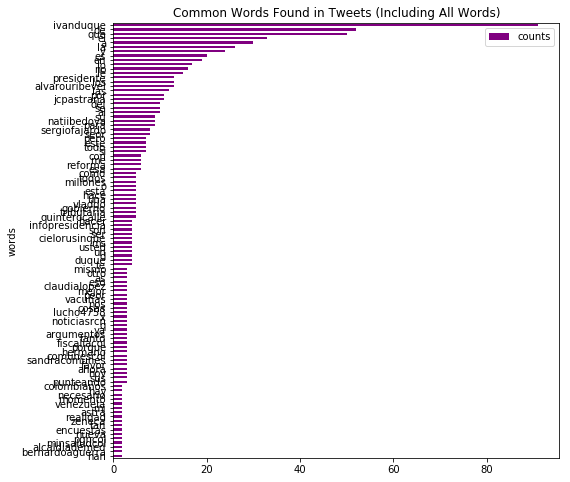

In [198]:
words_clean = [word for word in clean_tweets_no_urls.words
               if not word in stop_words]

In [199]:
words_clean

['ivanduque',
 'presidente',
 'alvarouribevel',
 'jcpastrana',
 'natiibedoya',
 'sergiofajardo',
 'seor',
 'si',
 'reforma',
 'quinterocalle',
 'tributaria',
 'gobierno',
 'vladdo',
 'hace',
 'millones',
 'infopresidencia',
 'ser',
 'hacer',
 'cielorusinque',
 'ms',
 'usted',
 'd',
 'duque',
 'punteando',
 'hoy',
 'favor',
 'sandracomunes',
 'comunescol',
 'hermano',
 'fiscaliacol',
 'argumentos',
 'ahora',
 'q',
 'cosas',
 'noticiasrcn',
 'as',
 'mismo',
 'claudialopez',
 'mejor',
 'vacunas',
 'peor',
 'lucho4758',
 'x',
 'bernardoaguerra',
 'alcaldiademed',
 'minsaludcol',
 'pgncol',
 'nueva',
 'encuestas',
 'tan',
 'momento',
 'realidad',
 'necesario',
 'colombianos',
 'venezuela',
 'astra',
 'zeneca']

In [223]:
newstopwords = ['ivanduque','x','q','si','ser','d','as']
for element in newstopwords:
    stop_words.append(element)
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [224]:
clean_tweets_no_urls_no_stop = clean_tweets_no_urls[~clean_tweets_no_urls.words.isin(stop_words)]

In [225]:
clean_tweets_no_urls_no_stop

,words,counts
12,presidente,13
14,alvarouribevel,13
17,jcpastrana,11
23,natiibedoya,9
24,sergiofajardo,8
25,seor,8
30,reforma,6
34,quinterocalle,5
36,tributaria,5
37,gobierno,5


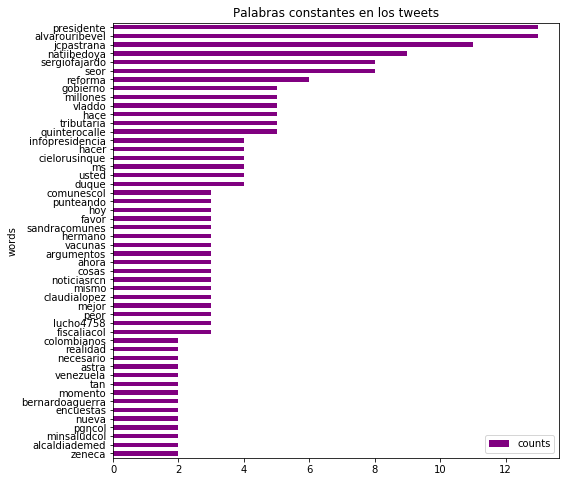

In [226]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls_no_stop.sort_values(by='counts').plot.barh(x='words',
                      y='counts',
                      ax=ax,
                      color="purple")

ax.set_title("Palabras constantes en los tweets")

plt.show()